In [2]:
from binance.client import Client
import matplotlib.pyplot as plt
import mplfinance as mpf

import pandas as pd


In [3]:
api_key = 'iyJXPaZztWrimkH6V57RGvStFgYQWRaaMdaYBQHHIEv0mMY1huCmrzTbXkaBjLFh'

api_secret = 'hmrus7zI9PW2EXqsDVovoS2cEFRVsxeETGgBf4XJInOLFcmIXKNL23alGRNRbXKI'
client = Client(api_key, api_secret)


In [4]:
interval='1h'
symbol = 'ETHUSDT'
n = 200

In [5]:
klines = client.futures_klines(symbol=symbol, interval=interval, limit=n)
len(klines)

200

In [9]:
timestamps = [int(kline[0]) for kline in klines]
open_prices = [float(kline[1]) for kline in klines]
high_prices = [float(kline[2]) for kline in klines]
low_prices = [float(kline[3]) for kline in klines]
close_prices = [float(kline[4]) for kline in klines]
date=pd.to_datetime(timestamps, unit='ms')

# Create a DataFrame with DatetimeIndex
new_data = pd.DataFrame({
    'date': date,
    'open': open_prices,
    'high': high_prices,
    'low': low_prices,
    'close': close_prices,
}, index=pd.to_datetime(timestamps, unit='ms'))
print(new_data.head)

<bound method NDFrame.head of                                    date     open     high      low    close
2023-12-13 00:00:00 2023-12-13 00:00:00  2204.71  2208.47  2200.04  2205.32
2023-12-13 01:00:00 2023-12-13 01:00:00  2205.33  2206.45  2175.44  2175.64
2023-12-13 02:00:00 2023-12-13 02:00:00  2175.51  2181.92  2146.00  2175.99
2023-12-13 03:00:00 2023-12-13 03:00:00  2175.99  2179.86  2163.60  2167.28
2023-12-13 04:00:00 2023-12-13 04:00:00  2167.29  2169.03  2145.33  2168.50
...                                 ...      ...      ...      ...      ...
2023-12-21 03:00:00 2023-12-21 03:00:00  2193.60  2204.42  2191.69  2202.21
2023-12-21 04:00:00 2023-12-21 04:00:00  2202.20  2208.70  2200.22  2201.50
2023-12-21 05:00:00 2023-12-21 05:00:00  2201.49  2207.48  2193.81  2196.18
2023-12-21 06:00:00 2023-12-21 06:00:00  2196.18  2219.49  2195.00  2216.42
2023-12-21 07:00:00 2023-12-21 07:00:00  2216.42  2221.89  2212.82  2217.36

[200 rows x 5 columns]>


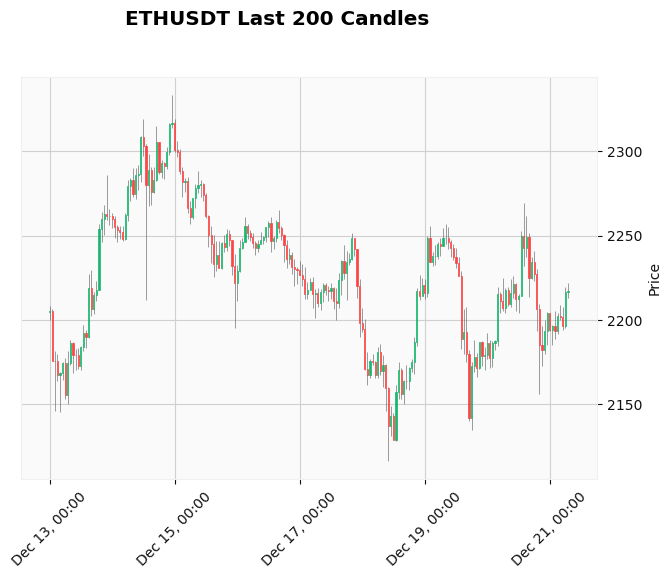

In [10]:
mpf.plot(new_data, type='candle', style='yahoo', title=f'{symbol} Last {n} Candles', ylabel='Price', show_nontrading=True)


In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming df is your DataFrame
df['target'] = (df['close'].shift(-1) > df['close']).astype(int)

# Feature Scaling
scaler = MinMaxScaler()
df[['open', 'high', 'low', 'close']] = scaler.fit_transform(df[['open', 'high', 'low', 'close']])

# Train-Test Split
X = df[['open', 'high', 'low', 'close']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=900, batch_size=200, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Assuming new_data is your new DataFrame with similar structure
new_data[['open', 'high', 'low', 'close']] = scaler.transform(new_data[['open', 'high', 'low', 'close']])
new_data['predicted_target'] = np.round(model.predict(new_data[['open', 'high', 'low', 'close']])).astype(int)


Epoch 1/900
1/1 [==============================] - 1s 1s/step - loss: 0.8943 - accuracy: 0.4938 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 2/900
1/1 [==============================] - 0s 25ms/step - loss: 0.7883 - accuracy: 0.5063 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 3/900
1/1 [==============================] - 0s 18ms/step - loss: 0.7255 - accuracy: 0.5875 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 4/900
1/1 [==============================] - 0s 17ms/step - loss: 0.6891 - accuracy: 0.5875 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 5/900
1/1 [==============================] - 0s 24ms/step - loss: 0.6742 - accuracy: 0.5688 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 6/900
1/1 [==============================] - 0s 24ms/step - loss: 0.6522 - accuracy: 0.6000 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 7/900
1/1 [==============================] - 0s 21ms/step - loss: 0.6375 - accuracy: 0.6313 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 8/900
1/1 [=====

1/1 [==============================] - 0s 20ms/step - loss: 0.2881 - accuracy: 0.9187 - val_loss: 0.7039 - val_accuracy: 0.5000
Epoch 118/900
1/1 [==============================] - 0s 12ms/step - loss: 0.2907 - accuracy: 0.9062 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 119/900
1/1 [==============================] - 0s 33ms/step - loss: 0.2809 - accuracy: 0.9187 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 120/900
1/1 [==============================] - 0s 17ms/step - loss: 0.2820 - accuracy: 0.9125 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 121/900
1/1 [==============================] - 0s 16ms/step - loss: 0.2815 - accuracy: 0.9125 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 122/900
1/1 [==============================] - 0s 33ms/step - loss: 0.2747 - accuracy: 0.9438 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 123/900
1/1 [==============================] - 0s 16ms/step - loss: 0.2713 - accuracy: 0.9438 - val_loss: 0.7040 - val_accuracy: 0.5000
Epoch 124/900
1/1 [=

Epoch 175/900
1/1 [==============================] - 0s 14ms/step - loss: 0.1893 - accuracy: 0.9625 - val_loss: 0.6991 - val_accuracy: 0.4750
Epoch 176/900
1/1 [==============================] - 0s 31ms/step - loss: 0.1902 - accuracy: 0.9625 - val_loss: 0.6990 - val_accuracy: 0.4750
Epoch 177/900
1/1 [==============================] - 0s 18ms/step - loss: 0.1852 - accuracy: 0.9688 - val_loss: 0.6989 - val_accuracy: 0.4500
Epoch 178/900
1/1 [==============================] - 0s 22ms/step - loss: 0.1789 - accuracy: 0.9563 - val_loss: 0.6991 - val_accuracy: 0.4500
Epoch 179/900
1/1 [==============================] - 0s 27ms/step - loss: 0.1818 - accuracy: 0.9625 - val_loss: 0.6993 - val_accuracy: 0.4500
Epoch 180/900
1/1 [==============================] - 0s 16ms/step - loss: 0.1817 - accuracy: 0.9625 - val_loss: 0.6993 - val_accuracy: 0.4500
Epoch 181/900
1/1 [==============================] - 0s 17ms/step - loss: 0.1769 - accuracy: 0.9625 - val_loss: 0.6994 - val_accuracy: 0.4500
Epoch 

Epoch 233/900
1/1 [==============================] - 0s 17ms/step - loss: 0.1270 - accuracy: 0.9812 - val_loss: 0.7164 - val_accuracy: 0.4750
Epoch 234/900
1/1 [==============================] - 0s 30ms/step - loss: 0.1282 - accuracy: 0.9812 - val_loss: 0.7166 - val_accuracy: 0.4750
Epoch 235/900
1/1 [==============================] - 0s 18ms/step - loss: 0.1302 - accuracy: 0.9812 - val_loss: 0.7182 - val_accuracy: 0.4750
Epoch 236/900
1/1 [==============================] - 0s 24ms/step - loss: 0.1381 - accuracy: 0.9688 - val_loss: 0.7177 - val_accuracy: 0.4750
Epoch 237/900
1/1 [==============================] - 0s 26ms/step - loss: 0.1387 - accuracy: 0.9688 - val_loss: 0.7198 - val_accuracy: 0.5000
Epoch 238/900
1/1 [==============================] - 0s 17ms/step - loss: 0.1244 - accuracy: 0.9937 - val_loss: 0.7209 - val_accuracy: 0.5000
Epoch 239/900
1/1 [==============================] - 0s 33ms/step - loss: 0.1216 - accuracy: 0.9937 - val_loss: 0.7220 - val_accuracy: 0.4750
Epoch 

Epoch 291/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0912 - accuracy: 0.9937 - val_loss: 0.7632 - val_accuracy: 0.4750
Epoch 292/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0897 - accuracy: 0.9937 - val_loss: 0.7671 - val_accuracy: 0.5000
Epoch 293/900
1/1 [==============================] - 0s 19ms/step - loss: 0.0905 - accuracy: 0.9875 - val_loss: 0.7708 - val_accuracy: 0.5000
Epoch 294/900
1/1 [==============================] - 0s 14ms/step - loss: 0.0876 - accuracy: 0.9937 - val_loss: 0.7690 - val_accuracy: 0.5000
Epoch 295/900
1/1 [==============================] - 0s 31ms/step - loss: 0.0881 - accuracy: 0.9875 - val_loss: 0.7665 - val_accuracy: 0.4750
Epoch 296/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0875 - accuracy: 0.9875 - val_loss: 0.7689 - val_accuracy: 0.4750
Epoch 297/900
1/1 [==============================] - 0s 34ms/step - loss: 0.0870 - accuracy: 0.9937 - val_loss: 0.7700 - val_accuracy: 0.5250
Epoch 

Epoch 349/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0605 - accuracy: 0.9937 - val_loss: 0.8330 - val_accuracy: 0.5250
Epoch 350/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0661 - accuracy: 0.9875 - val_loss: 0.8525 - val_accuracy: 0.5250
Epoch 351/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0616 - accuracy: 1.0000 - val_loss: 0.8412 - val_accuracy: 0.5250
Epoch 352/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0607 - accuracy: 0.9937 - val_loss: 0.8308 - val_accuracy: 0.5250
Epoch 353/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0625 - accuracy: 0.9937 - val_loss: 0.8467 - val_accuracy: 0.5250
Epoch 354/900
1/1 [==============================] - 0s 19ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 0.8656 - val_accuracy: 0.5250
Epoch 355/900
1/1 [==============================] - 0s 24ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.8617 - val_accuracy: 0.5250
Epoch 

Epoch 407/900
1/1 [==============================] - 0s 34ms/step - loss: 0.0404 - accuracy: 1.0000 - val_loss: 0.8596 - val_accuracy: 0.4750
Epoch 408/900
1/1 [==============================] - 0s 15ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.8528 - val_accuracy: 0.4750
Epoch 409/900
1/1 [==============================] - 0s 20ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.8495 - val_accuracy: 0.4750
Epoch 410/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 0.8533 - val_accuracy: 0.4750
Epoch 411/900
1/1 [==============================] - 0s 26ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.8545 - val_accuracy: 0.5250
Epoch 412/900
1/1 [==============================] - 0s 25ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.8512 - val_accuracy: 0.5250
Epoch 413/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.8461 - val_accuracy: 0.5250
Epoch 

Epoch 465/900
1/1 [==============================] - 0s 19ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.9419 - val_accuracy: 0.5250
Epoch 466/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.9335 - val_accuracy: 0.5000
Epoch 467/900
1/1 [==============================] - 0s 36ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.9530 - val_accuracy: 0.5250
Epoch 468/900
1/1 [==============================] - 0s 13ms/step - loss: 0.0349 - accuracy: 0.9937 - val_loss: 0.9478 - val_accuracy: 0.5000
Epoch 469/900
1/1 [==============================] - 0s 49ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.9609 - val_accuracy: 0.5000
Epoch 470/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.9802 - val_accuracy: 0.5000
Epoch 471/900
1/1 [==============================] - 0s 37ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.9662 - val_accuracy: 0.4750
Epoch 

Epoch 523/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 1.1939 - val_accuracy: 0.4500
Epoch 524/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 1.1973 - val_accuracy: 0.4750
Epoch 525/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 1.2003 - val_accuracy: 0.4500
Epoch 526/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 1.1822 - val_accuracy: 0.4500
Epoch 527/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 1.1827 - val_accuracy: 0.4500
Epoch 528/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 1.2136 - val_accuracy: 0.4500
Epoch 529/900
1/1 [==============================] - 0s 31ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 1.2085 - val_accuracy: 0.4500
Epoch 

Epoch 581/900
1/1 [==============================] - 0s 24ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.4256 - val_accuracy: 0.4250
Epoch 582/900
1/1 [==============================] - 0s 10ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 1.3827 - val_accuracy: 0.4250
Epoch 583/900
1/1 [==============================] - 0s 33ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 1.4124 - val_accuracy: 0.4250
Epoch 584/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 1.4666 - val_accuracy: 0.4000
Epoch 585/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 1.3802 - val_accuracy: 0.4250
Epoch 586/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.3954 - val_accuracy: 0.4500
Epoch 587/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 1.3941 - val_accuracy: 0.4500
Epoch 

Epoch 639/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.5095 - val_accuracy: 0.4500
Epoch 640/900
1/1 [==============================] - 0s 31ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.5035 - val_accuracy: 0.4500
Epoch 641/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 1.5316 - val_accuracy: 0.4500
Epoch 642/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.5353 - val_accuracy: 0.4750
Epoch 643/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 1.5252 - val_accuracy: 0.4750
Epoch 644/900
1/1 [==============================] - 0s 14ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 1.5346 - val_accuracy: 0.4250
Epoch 645/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 1.5529 - val_accuracy: 0.4250
Epoch 

Epoch 697/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 1.7067 - val_accuracy: 0.4500
Epoch 698/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.7268 - val_accuracy: 0.4500
Epoch 699/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 1.7405 - val_accuracy: 0.4500
Epoch 700/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 1.7339 - val_accuracy: 0.4500
Epoch 701/900
1/1 [==============================] - 0s 19ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.7158 - val_accuracy: 0.4500
Epoch 702/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.7970 - val_accuracy: 0.4250
Epoch 703/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.7378 - val_accuracy: 0.4750
Epoch 

Epoch 755/900
1/1 [==============================] - 0s 20ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.8415 - val_accuracy: 0.4000
Epoch 756/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.7845 - val_accuracy: 0.4000
Epoch 757/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.8013 - val_accuracy: 0.4000
Epoch 758/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.8379 - val_accuracy: 0.4000
Epoch 759/900
1/1 [==============================] - 0s 33ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.8373 - val_accuracy: 0.4000
Epoch 760/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.7868 - val_accuracy: 0.4000
Epoch 761/900
1/1 [==============================] - 0s 31ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.8082 - val_accuracy: 0.4250
Epoch 

Epoch 813/900
1/1 [==============================] - 0s 30ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 2.3480 - val_accuracy: 0.5000
Epoch 814/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.3878 - val_accuracy: 0.5000
Epoch 815/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.3322 - val_accuracy: 0.5000
Epoch 816/900
1/1 [==============================] - 0s 34ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.3514 - val_accuracy: 0.5000
Epoch 817/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.3262 - val_accuracy: 0.5000
Epoch 818/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 2.3205 - val_accuracy: 0.5000
Epoch 819/900
1/1 [==============================] - 0s 33ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.3345 - val_accuracy: 0.5000
Epoch 

Epoch 871/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 2.7175 - val_accuracy: 0.5000
Epoch 872/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.8014 - val_accuracy: 0.5000
Epoch 873/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.8586 - val_accuracy: 0.5000
Epoch 874/900
1/1 [==============================] - 0s 31ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 2.7679 - val_accuracy: 0.5000
Epoch 875/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 2.8109 - val_accuracy: 0.5000
Epoch 876/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.8151 - val_accuracy: 0.4750
Epoch 877/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.8182 - val_accuracy: 0.5250
Epoch 

In [155]:
df['predicted_prob'] = model.predict(X)
threshold = 0.5  # You can adjust this threshold based on your strategy
df['trading_signal'] = np.where(df['predicted_prob'] > threshold, 1, -1)

# Print or visualize the trading signals
pd.set_option('display.max_rows', None)

print(df[['close', 'predicted_prob', 'trading_signal']])


7/7 [==============================] - 0s 1ms/step
                        close  predicted_prob  trading_signal
2023-12-11 08:15:00  0.242520        0.002967              -1
2023-12-11 08:16:00  0.140979        0.999971               1
2023-12-11 08:17:00  0.243880        0.001687              -1
2023-12-11 08:18:00  0.194016        0.999995               1
2023-12-11 08:19:00  0.237987        0.328860              -1
2023-12-11 08:20:00  0.184044        0.005380              -1
2023-12-11 08:21:00  0.141432        0.003234              -1
2023-12-11 08:22:00  0.000000        0.999494               1
2023-12-11 08:23:00  0.034905        0.005656              -1
2023-12-11 08:24:00  0.024025        1.000000               1
2023-12-11 08:25:00  0.095648        0.999997               1
2023-12-11 08:26:00  0.190843        0.000883              -1
2023-12-11 08:27:00  0.171804        0.999698               1
2023-12-11 08:28:00  0.188123        0.999999               1
2023-12-11 08:29:00

In [157]:
# Save the entire model to a HDF5 file
model.save('trade_model_1min.h5')


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [163]:
# Load the saved model
interval='1m'
symbol = 'ETHUSDT'
n = 2
klines = client.futures_klines(symbol=symbol, interval=interval, limit=n)
len(klines)

timestamps = [int(kline[0]) for kline in klines]
open_prices = [float(kline[1]) for kline in klines]
high_prices = [float(kline[2]) for kline in klines]
low_prices = [float(kline[3]) for kline in klines]
close_prices = [float(kline[4]) for kline in klines]
date=pd.to_datetime(timestamps, unit='ms')

# Create a DataFrame with DatetimeIndex
new_data = pd.DataFrame({
    'date': date,
    'open': open_prices,
    'high': high_prices,
    'low': low_prices,
    'close': close_prices,
}, index=pd.to_datetime(timestamps, unit='ms'))
print(new_data.head)

<bound method NDFrame.head of                                    date     open     high      low    close
2023-12-11 11:44:00 2023-12-11 11:44:00  2246.35  2246.36  2245.19  2245.31
2023-12-11 11:45:00 2023-12-11 11:45:00  2245.30  2246.48  2245.20  2246.47>


In [164]:
loaded_model = tf.keras.models.load_model('trade_model_1min.h5')

# Assuming you have new data in a DataFrame called 'new_data'
# Preprocess the new data (feature scaling, etc.)
new_data[['open', 'high', 'low', 'close']] = scaler.transform(new_data[['open', 'high', 'low', 'close']])

# Extract features and target
X_new = new_data[['open', 'high', 'low', 'close']]
y_new = (new_data['close'].shift(-1) > new_data['close']).astype(int)

# Train-Test Split (you can use the entire dataset if needed)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train the loaded model on new data
loaded_model.fit(X_train_new, y_train_new, epochs=900, batch_size=10, validation_data=(X_test_new, y_test_new))

# Predict probabilities on the entire new dataset using the loaded model
new_data['predicted_prob'] = loaded_model.predict(X_new)

# Apply a threshold to convert probabilities to binary signals
threshold = 0.5
new_data['trading_signal'] = np.where(new_data['predicted_prob'] > threshold, 1, -1)

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Print or visualize the trading signals
print(new_data[['close', 'predicted_prob', 'trading_signal']])

# Save the updated model
loaded_model.save('trade_model_1min.h5')

Epoch 1/900
1/1 [==============================] - 1s 665ms/step - loss: 0.3668 - accuracy: 1.0000 - val_loss: 1.1426e-11 - val_accuracy: 1.0000
Epoch 2/900
1/1 [==============================] - 0s 25ms/step - loss: 0.3547 - accuracy: 1.0000 - val_loss: 8.1138e-12 - val_accuracy: 1.0000
Epoch 3/900
1/1 [==============================] - 0s 16ms/step - loss: 0.3370 - accuracy: 1.0000 - val_loss: 5.7618e-12 - val_accuracy: 1.0000
Epoch 4/900
1/1 [==============================] - 0s 32ms/step - loss: 0.3164 - accuracy: 1.0000 - val_loss: 4.0766e-12 - val_accuracy: 1.0000
Epoch 5/900
1/1 [==============================] - 0s 22ms/step - loss: 0.2945 - accuracy: 1.0000 - val_loss: 2.8676e-12 - val_accuracy: 1.0000
Epoch 6/900
1/1 [==============================] - 0s 25ms/step - loss: 0.2723 - accuracy: 1.0000 - val_loss: 2.0023e-12 - val_accuracy: 1.0000
Epoch 7/900
1/1 [==============================] - 0s 18ms/step - loss: 0.2506 - accuracy: 1.0000 - val_loss: 1.3915e-12 - val_accuracy

1/1 [==============================] - 0s 20ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 114/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 115/900
1/1 [==============================] - 0s 15ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 116/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 117/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 118/900
1/1 [==============================] - 0s 31ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 119/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy:

1/1 [==============================] - 0s 18ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 226/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 227/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 228/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 229/900
1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 230/900
1/1 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 231/900
1/1 [==============================] - 0s 34ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 

1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 338/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 339/900
1/1 [==============================] - 0s 15ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 340/900
1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 341/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 342/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 343/900
1/1 [==============================] - 0s 34ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy:

1/1 [==============================] - 0s 29ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 450/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 451/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 452/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 453/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 454/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 455/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy:

1/1 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 562/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 563/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 564/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 565/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 566/900
1/1 [==============================] - 0s 32ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 567/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy:

1/1 [==============================] - 0s 20ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 674/900
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 675/900
1/1 [==============================] - 0s 21ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 676/900
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 677/900
1/1 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 678/900
1/1 [==============================] - 0s 20ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 679/900
1/1 [==============================] - 0s 19ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy:

Epoch 783/900
1/1 [==============================] - 0s 16ms/step - loss: 8.4530e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 784/900
1/1 [==============================] - 0s 21ms/step - loss: 8.4384e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 785/900
1/1 [==============================] - 0s 25ms/step - loss: 8.4239e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 786/900
1/1 [==============================] - 0s 17ms/step - loss: 8.4094e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 787/900
1/1 [==============================] - 0s 17ms/step - loss: 8.3949e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 788/900
1/1 [==============================] - 0s 31ms/step - loss: 8.3805e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 789/900
1/1 [==============================] - 0s 18ms/step - loss: 8.3661e-04 - accuracy: 1.0

Epoch 892/900
1/1 [==============================] - 0s 17ms/step - loss: 7.0698e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 893/900
1/1 [==============================] - 0s 19ms/step - loss: 7.0588e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 894/900
1/1 [==============================] - 0s 16ms/step - loss: 7.0478e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 895/900
1/1 [==============================] - 0s 17ms/step - loss: 7.0369e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 896/900
1/1 [==============================] - 0s 19ms/step - loss: 7.0259e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 897/900
1/1 [==============================] - 0s 17ms/step - loss: 7.0150e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 898/900
1/1 [==============================] - 0s 26ms/step - loss: 7.0042e-04 - accuracy: 1.0

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your data
# Assuming you have already loaded the data into the 'new_data' DataFrame

# Create features (X) and target variable (y)
X = new_data[['open', 'high', 'low', 'close']]
y = (new_data['close'].shift(-1) - new_data['open'] >= 30).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Save the trained model for future use
import joblib
joblib.dump(model, 'trade_strategy_model.joblib')


Model Accuracy: 92.50%


['trade_strategy_model.joblib']

In [14]:
import pandas as pd
import joblib

# Load the already trained model
model = joblib.load('trade_strategy_model.joblib')

# Assuming 'new_data' is your DataFrame with the price data
timestamps = [int(kline[0]) for kline in klines]
open_prices = [float(kline[1]) for kline in klines]
high_prices = [float(kline[2]) for kline in klines]
low_prices = [float(kline[3]) for kline in klines]
close_prices = [float(kline[4]) for kline in klines]
date = pd.to_datetime(timestamps, unit='ms')

# Create a DataFrame with DatetimeIndex
new_data = pd.DataFrame({
    'date': date,
    'open': open_prices,
    'high': high_prices,
    'low': low_prices,
    'close': close_prices,
}, index=pd.to_datetime(timestamps, unit='ms'))
new_data.dropna(inplace=True)

# Create features for prediction
X_predict = new_data[['open', 'high', 'low', 'close']]

# Predict the trading signals (1: Buy, 0: Hold)
new_data['signal'] = model.predict(X_predict)

# Simulate trades
wallet_amount = 1000
position_size = 1  # Assuming 1 unit per trade

new_data['position'] = new_data['signal'].diff()  # Entry/Exit signals
new_data['position'].fillna(0, inplace=True)

# Calculate PnL (Profit and Loss)
new_data['pnl'] = new_data['position'] * (new_data['close'].shift(-1) - new_data['open']) * position_size

# Calculate cumulative PnL
new_data['cumulative_pnl'] = new_data['pnl'].cumsum()

# Print the simulated trades and cumulative PnL
print(new_data[['date', 'open', 'close', 'signal', 'pnl', 'cumulative_pnl']])

# Calculate and print the total PnL
total_pnl = new_data['cumulative_pnl'].iloc[-1]
print(f'Total PnL: {total_pnl:.2f}')


                                   date     open    close  signal  pnl  \
2023-12-13 00:00:00 2023-12-13 00:00:00  2204.71  2205.32       0 -0.0   
2023-12-13 01:00:00 2023-12-13 01:00:00  2205.33  2175.64       0 -0.0   
2023-12-13 02:00:00 2023-12-13 02:00:00  2175.51  2175.99       0 -0.0   
2023-12-13 03:00:00 2023-12-13 03:00:00  2175.99  2167.28       0 -0.0   
2023-12-13 04:00:00 2023-12-13 04:00:00  2167.29  2168.50       0  0.0   
...                                 ...      ...      ...     ...  ...   
2023-12-21 03:00:00 2023-12-21 03:00:00  2193.60  2202.21       0  0.0   
2023-12-21 04:00:00 2023-12-21 04:00:00  2202.20  2201.50       0 -0.0   
2023-12-21 05:00:00 2023-12-21 05:00:00  2201.49  2196.18       0  0.0   
2023-12-21 06:00:00 2023-12-21 06:00:00  2196.18  2216.42       0  0.0   
2023-12-21 07:00:00 2023-12-21 07:00:00  2216.42  2217.36       0  NaN   

                     cumulative_pnl  
2023-12-13 00:00:00           -0.00  
2023-12-13 01:00:00           -0.00

<Axes: >

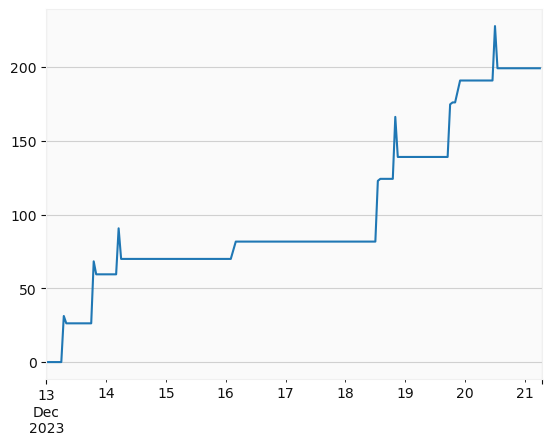

In [15]:
pd.Series(new_data.cumulative_pnl).plot()

In [7]:
import pandas as pd
from binance.client import Client

# Define trading parameters
symbol: str = 'BTCUSDT'
interval = '15min'
initial_balance = 0.4  # Starting with $1
profit_target = 122  # Target $10 profit
client = Client()
symbol = 'BTCUSDT'
interval = '15m'

In [14]:
def get_historical_klines(symbol, interval, limit=1000):
    klines = client.futures_klines(symbol=symbol, interval=interval, limit=limit)
    df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

In [15]:
# Function to calculate simple moving average (SMA)
def calculate_sma(df, window=20):
    df['close'] = pd.to_numeric(df['close'], errors='coerce')  # Convert 'close' to numeric
    df['sma'] = df['close'].rolling(window=window).mean()
    df = df.dropna()  # Drop rows with missing values
    return df

In [10]:
latest_data

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-12-26 06:30:00,42714.90,42806.00,42681.10,42806.00,1479.953,1703573099999,63252942.48447,16345,839.421,35877297.23159,0


In [11]:
def calculate_sma(df, window=20):
    df['close'] = pd.to_numeric(df['close'], errors='coerce')  # Convert 'close' to numeric
    df['sma'] = df['close'].rolling(window=window).mean()
    df = df.dropna()  # Drop rows with missing values
    return df


In [12]:
latest_data = calculate_sma(latest_data)


In [13]:
latest_data

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,sma
